### Word2vec

Сегодня мы научимся работать с word2vec моделями. Загрузим и потестим предобученную, посмотрим, какие крутые свойства и функции у нее бывают, обучим свою модель и с помощью нее улучшим качество кластеризации(и/или классификации) текстов

Установим все необходимое

!pip3 install tqdm
!pip3 install pymorphy2
!pip3 install gensim
!pip3 install sklearn
!pip3 install pandas
!pip3 install matplotlib

#### Скачаем rucorpora 15 с диска https://yadi.sk/d/fLRMFhm03Pbs98

In [1]:
# Прописываем путь до файла
#path_to_ruscorpora = <Ваш код>
path_to_ruscorpora = 'ruscorpora.model.bin'

Импортируем нужные библиотеки

In [5]:
from gensim.models import Word2Vec
import pandas as pd
from tqdm import tqdm
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

C:\Users\Vitaly\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Шапка для картинок

In [6]:
import matplotlib.pyplot as plt
# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
plt.style.use('default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)


import matplotlib as mpl
mpl.rcParams['font.family'] = 'Ubuntu'

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

# чтобы был русский шрифт
from matplotlib import rc
 
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)# для встроенных картинок


Populating the interactive namespace from numpy and matplotlib


Сначала познакомимся с уже готовой реализацией word2vec на gensim

#### Загрузим обученную на ruscorpora модель word2vec

In [4]:
model_word2vec = gensim.models.KeyedVectors.load_word2vec_format(path_to_ruscorpora, binary = True)

In [5]:
model_word2vec.wv.vocab

{'нарусова': <gensim.models.keyedvectors.Vocab at 0x1577a75bf28>,
 'ветреничать': <gensim.models.keyedvectors.Vocab at 0x1571cb675f8>,
 'малко': <gensim.models.keyedvectors.Vocab at 0x157208523c8>,
 'карб': <gensim.models.keyedvectors.Vocab at 0x1577ccfd8d0>,
 'зубчатка': <gensim.models.keyedvectors.Vocab at 0x1577a3d7c88>,
 'тонкошеий': <gensim.models.keyedvectors.Vocab at 0x1577a5897f0>,
 'вигский': <gensim.models.keyedvectors.Vocab at 0x1571cc76278>,
 'зыкова': <gensim.models.keyedvectors.Vocab at 0x1577cbc3828>,
 'сисин': <gensim.models.keyedvectors.Vocab at 0x1577f8ec2b0>,
 'петрушенко': <gensim.models.keyedvectors.Vocab at 0x1577c5b3908>,
 'погонин': <gensim.models.keyedvectors.Vocab at 0x1577aa89d30>,
 'постимпрессионист': <gensim.models.keyedvectors.Vocab at 0x1577c630518>,
 'цезарь': <gensim.models.keyedvectors.Vocab at 0x15777ed0828>,
 'nt': <gensim.models.keyedvectors.Vocab at 0x1577a1e4c18>,
 'наддавать': <gensim.models.keyedvectors.Vocab at 0x15779959208>,
 'карябать': <ge

#### Посмотрим, как с ней обращаться

Можно посмотреть наиболее похожие на одни и наиболее непохожие на другие слова. Попробуйте свойтсва векторов word2vec и подумать какие слова нужно послать на вход, чтобы получить на выходе слова "школа",  "машинное", "обучение"

In [51]:
model_word2vec.most_similar(positive=['учеба','гимназия','занятие'],
                            negative=[], topn=3)

[('школа', 0.5777938365936279),
 ('курсы', 0.5749321579933167),
 ('обучение', 0.5554687976837158)]

In [59]:
model_word2vec.most_similar(positive=['корабль', 'летать'], negative=['плавать'], topn=3)

[('самолет', 0.5802854299545288),
 ('судно', 0.533637523651123),
 ('дирижабль', 0.5083058476448059)]

In [60]:
model_word2vec.most_similar(positive=['шахтер'], negative=['грязь'], topn=3)

[('горняк', 0.3543156683444977),
 ('ударник', 0.336887001991272),
 ('металлург', 0.3220180869102478)]

In [61]:
model_word2vec.most_similar(positive=['учение', 'тьма'], negative=['свет'], topn=3)

[('мрак', 0.4193800687789917),
 ('догмат', 0.38442569971084595),
 ('философия', 0.3840946555137634)]

Еще есть прикольная функция, которая выводит слово, лишнее в строке. Попробуйте придумать пример, который word2vec не взломает

In [52]:
model_word2vec.doesnt_match("содовая жиле сок морс".split())

'содовая'

Функция, которая выводит сходство между словами.  С ее помощью можно понимать значение слова нефть

In [63]:
print(model_word2vec.similarity('нефть', 'газ'))
print(model_word2vec.similarity('нефть', 'вода'))
print(model_word2vec.similarity('нефть', 'водка'))
print(model_word2vec.similarity('нефть', 'духи'))
print(model_word2vec.similarity('нефть', 'компот'))


0.401784575535
0.246770688846
0.0859883239246
0.0297233953559
0.014373137645


Или смотреть, где в России больше нефти

In [64]:
print(model_word2vec.similarity('нефть', 'чечня'))
print(model_word2vec.similarity('нефть', 'якутск'))
print(model_word2vec.similarity('нефть', 'москва'))
print(model_word2vec.similarity('нефть', 'саратов'))
print(model_word2vec.similarity('нефть', 'сибирь'))

0.102318135805
0.0374594075176
0.00765520311232
0.00437990603761
0.0863051911584


### Теперь давайте обучим собственную модель

 В качестве обучающего корпуса возьмем новости по 20 темам

In [2]:
from sklearn.datasets import fetch_20newsgroups
train_all = fetch_20newsgroups(subset='train')
print(train_all.target_names, " - 20 возможных тем")

dataset = fetch_20newsgroups(
    subset='train', 
    categories=['comp.sys.mac.hardware', 'soc.religion.christian', 'rec.sport.hockey'])

dataset.data[0].split()

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']  - 20 возможных тем


['From:',
 'erik@cheshire.oxy.edu',
 '(Erik',
 'Adams)',
 'Subject:',
 'HELP!!',
 'My',
 'Macintosh',
 '"luggable"',
 'has',
 'lines',
 'on',
 'its',
 'screen!',
 'Organization:',
 'Occidental',
 'College,',
 'Los',
 'Angeles,',
 'CA',
 '90041',
 'USA.',
 'Distribution:',
 'comp',
 'Lines:',
 '20',
 'Okay,',
 'I',
 "don't",
 'use',
 'it',
 'very',
 'much,',
 'but',
 'I',
 'would',
 'like',
 'for',
 'it',
 'to',
 'keep',
 'working',
 'correctly,',
 'at',
 'least',
 'as',
 'long',
 'as',
 'Apple',
 'continues',
 'to',
 'make',
 'System',
 'software',
 'that',
 'will',
 'run',
 'on',
 'it,',
 'if',
 'slowly',
 ':-)',
 'Here',
 'is',
 'the',
 'problem:',
 'When',
 'the',
 'screen',
 'is',
 'tilted',
 'too',
 'far',
 'back,',
 'vertical',
 'lines',
 'appear',
 'on',
 'the',
 'screen.',
 'They',
 'are',
 'every',
 '10',
 'pixels',
 'or',
 'so,',
 'and',
 'seem',
 'to',
 'be',
 'affected',
 'somewhat',
 'by',
 'opening',
 'windows',
 'and',
 'pulling',
 'down',
 'menus.',
 'It',
 'looks',
 't

In [63]:
x = 'dfgnsdjkgfn sd№snfdgln dffvs.dfv 3q4sdf, sdfs -sdf sdf-sdfsd'
dict_rus = ''.join(x)
translator = str.maketrans({key: ' ' for key in string.punctuation.replace('/', '').replace('-', '') + string.digits + '№/-'})
dict_rus =dict_rus.translate(translator).lower()
dict_rus.split()

['dfgnsdjkgfn',
 'sd',
 'snfdgln',
 'dffvs',
 'dfv',
 'q',
 'sdf',
 'sdfs',
 'sdf',
 'sdf',
 'sdfsd']

Предобраотаем эти новости. Выкинем цифры, знаки пунктуации, переведем в нижний регистр, разобьем на слова.
Нормализуйте слова, например, с помощью модуля nltk (или используйте любой другой способ на ваш выбор)

In [132]:
import string 
def normalize(x):
    dict_rus = ''.join(x)
    translator = str.maketrans({key: ' ' for key in string.punctuation + string.digits + '№-/'})
    dict_rus =dict_rus.translate(translator).lower()
    corpus = dict_rus.split()
    #stops
    stops=['a','the','had', 'have', 'am', 'm', 's', 're', 
           'be', 'to', 'is', 'are', 'will', 'was', 'were',
          'of']
    corpus=[token for token in corpus if token not in stops]
    #text canonicalization
    return(corpus)

In [122]:
word_sort

[('not', 3253),
 ('edu', 3209),
 ('this', 3198),
 ('on', 3064),
 ('with', 2791),
 ('he', 2384),
 ('if', 2180),
 ('they', 2013),
 ('subject', 1890),
 ('or', 1863),
 ('lines', 1837),
 ('we', 1807),
 ('at', 1799),
 ('can', 1767),
 ('organization', 1718),
 ('what', 1633),
 ('all', 1569),
 ('my', 1533),
 ('there', 1524),
 ('by', 1522),
 ('god', 1503),
 ('would', 1492),
 ('one', 1488),
 ('an', 1425),
 ('do', 1352),
 ('about', 1339),
 ('who', 1291),
 ('has', 1271),
 ('his', 1209),
 ('so', 1206),
 ('no', 1148),
 ('me', 1097),
 ('writes', 1092),
 ('university', 1051),
 ('some', 1023),
 ('when', 994),
 ('com', 964),
 ('your', 941),
 ('out', 935),
 ('article', 927),
 ('any', 920),
 ('don', 909),
 ('ca', 906),
 ('think', 904),
 ('which', 886),
 ('like', 885),
 ('know', 881),
 ('people', 875),
 ('only', 873),
 ('their', 856),
 ('just', 855),
 ('up', 811),
 ('does', 788),
 ('more', 783),
 ('how', 774),
 ('been', 759),
 ('other', 744),
 ('new', 717),
 ('team', 709),
 ('time', 706),
 ('get', 705),
 ('

In [133]:
# Применяем фунции предобработки к нашим новостям
data_normalized = [normalize(new) for new in tqdm(dataset.data)]


100%|████████████████████████████████████████████████████████████████████████████| 1777/1777 [00:00<00:00, 4738.15it/s]

In [106]:
print(dataset.data[0])
data_normalized[0]

From: erik@cheshire.oxy.edu (Erik Adams)
Subject: HELP!!  My Macintosh "luggable" has lines on its screen!
Organization: Occidental College, Los Angeles, CA 90041 USA.
Distribution: comp
Lines: 20

Okay, I don't use it very much, but I would like for it to keep working
correctly, at least as long as Apple continues to make System software
that will run on it, if slowly :-)

Here is the problem:  When the screen is tilted too far back, vertical
lines appear on the screen.  They are every 10 pixels or so, and seem
to be affected somewhat by opening windows and pulling down menus.
It looks to a semi-technical person like there is a loose connection
between the screen and the rest of the computer.

I am open to suggestions that do not involve buying a new computer,
or taking this one to the shop.  I would also like to not have
to buy one of Larry Pina's books.  I like Larry, but I'm not sure
I feel strongly enough about the computer to buy a service manual
for it.

On a related note:  what

['erik',
 'cheshire',
 'oxy',
 'edu',
 'erik',
 'adams',
 'subject',
 'help',
 'my',
 'macintosh',
 'luggable',
 'has',
 'lines',
 'on',
 'its',
 'screen',
 'organization',
 'occidental',
 'college',
 'los',
 'angeles',
 'ca',
 'usa',
 'distribution',
 'comp',
 'lines',
 'okay',
 'don',
 'use',
 'very',
 'much',
 'would',
 'like',
 'keep',
 'working',
 'correctly',
 'at',
 'least',
 'long',
 'apple',
 'continues',
 'make',
 'system',
 'software',
 'run',
 'on',
 'if',
 'slowly',
 'here',
 'problem',
 'when',
 'screen',
 'tilted',
 'too',
 'far',
 'back',
 'vertical',
 'lines',
 'appear',
 'on',
 'screen',
 'they',
 'every',
 'pixels',
 'or',
 'so',
 'seem',
 'affected',
 'somewhat',
 'by',
 'opening',
 'windows',
 'pulling',
 'down',
 'menus',
 'looks',
 'semi',
 'technical',
 'person',
 'like',
 'there',
 'loose',
 'connection',
 'between',
 'screen',
 'rest',
 'computer',
 'open',
 'suggestions',
 'do',
 'not',
 'involve',
 'buying',
 'new',
 'computer',
 'or',
 'taking',
 'this',
 '

Все, обучающий корпус готов!

In [141]:
# импортируем модули, настраиваем логирование
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = data_normalized
model = gensim.models.Word2Vec(sentences, min_count=1)

2017-11-18 22:13:20,752 : INFO : collecting all words and their counts
2017-11-18 22:13:20,752 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-11-18 22:13:20,877 : INFO : collected 23715 word types from a corpus of 420371 raw words and 1777 sentences
2017-11-18 22:13:20,877 : INFO : Loading a fresh vocabulary
2017-11-18 22:13:20,939 : INFO : min_count=1 retains 23715 unique words (100% of original 23715, drops 0)
2017-11-18 22:13:20,939 : INFO : min_count=1 leaves 420371 word corpus (100% of original 420371, drops 0)
2017-11-18 22:13:21,033 : INFO : deleting the raw counts dictionary of 23715 items
2017-11-18 22:13:21,049 : INFO : sample=0.001 downsamples 42 most-common words
2017-11-18 22:13:21,049 : INFO : downsampling leaves estimated 367256 word corpus (87.4% of prior 420371)
2017-11-18 22:13:21,049 : INFO : estimated required memory for 23715 words and 100 dimensions: 30829500 bytes
2017-11-18 22:13:21,142 : INFO : resetting layer weights
2017-11-18

In [142]:
model = gensim.models.Word2Vec(iter=1)  # Задаем пустую модель, не натренированную
model.build_vocab(sentences)  # Строим словарь
model.train(sentences, total_examples=model.corpus_count, epochs=20)  # Тренируем модель

2017-11-18 22:13:23,315 : INFO : collecting all words and their counts
2017-11-18 22:13:23,315 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-11-18 22:13:23,424 : INFO : collected 23715 word types from a corpus of 420371 raw words and 1777 sentences
2017-11-18 22:13:23,424 : INFO : Loading a fresh vocabulary
2017-11-18 22:13:23,690 : INFO : min_count=5 retains 7897 unique words (33% of original 23715, drops 15818)
2017-11-18 22:13:23,690 : INFO : min_count=5 leaves 392280 word corpus (93% of original 420371, drops 28091)
2017-11-18 22:13:23,736 : INFO : deleting the raw counts dictionary of 23715 items
2017-11-18 22:13:23,739 : INFO : sample=0.001 downsamples 45 most-common words
2017-11-18 22:13:23,740 : INFO : downsampling leaves estimated 336424 word corpus (85.8% of prior 392280)
2017-11-18 22:13:23,741 : INFO : estimated required memory for 7897 words and 100 dimensions: 10266100 bytes
2017-11-18 22:13:23,784 : INFO : resetting layer weights
2017-1

6728954

Теперь давайте нарисуем слова из первой новости в нашем новом пространстве

In [143]:
# Берем слова из первой новости, достаем соостветствующие векторы, выбрасываем слова, для которых векторов нет. 
# Подумайте - как так могло получится, что нет векторов?
# Возможно, алгоритм убрал редкие слова.
labels = []
embeddings = []
data_to_tsne = [item for sublist in data_normalized[:20] for item in sublist]
for x in list(set(data_to_tsne)):
    try:
        embeddings.append(model[x])
        labels.append(x)
    except KeyError:
        continue
         

In [144]:
# Пишем функцию, которая будет нам все отрисовывать.
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.show()
    #plt.savefig(filename)

In [145]:


# Сжимаем наше 100-мерное пространство в 2-х мерное
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 1000
low_dim_embs = tsne.fit_transform((embeddings[:plot_only]))


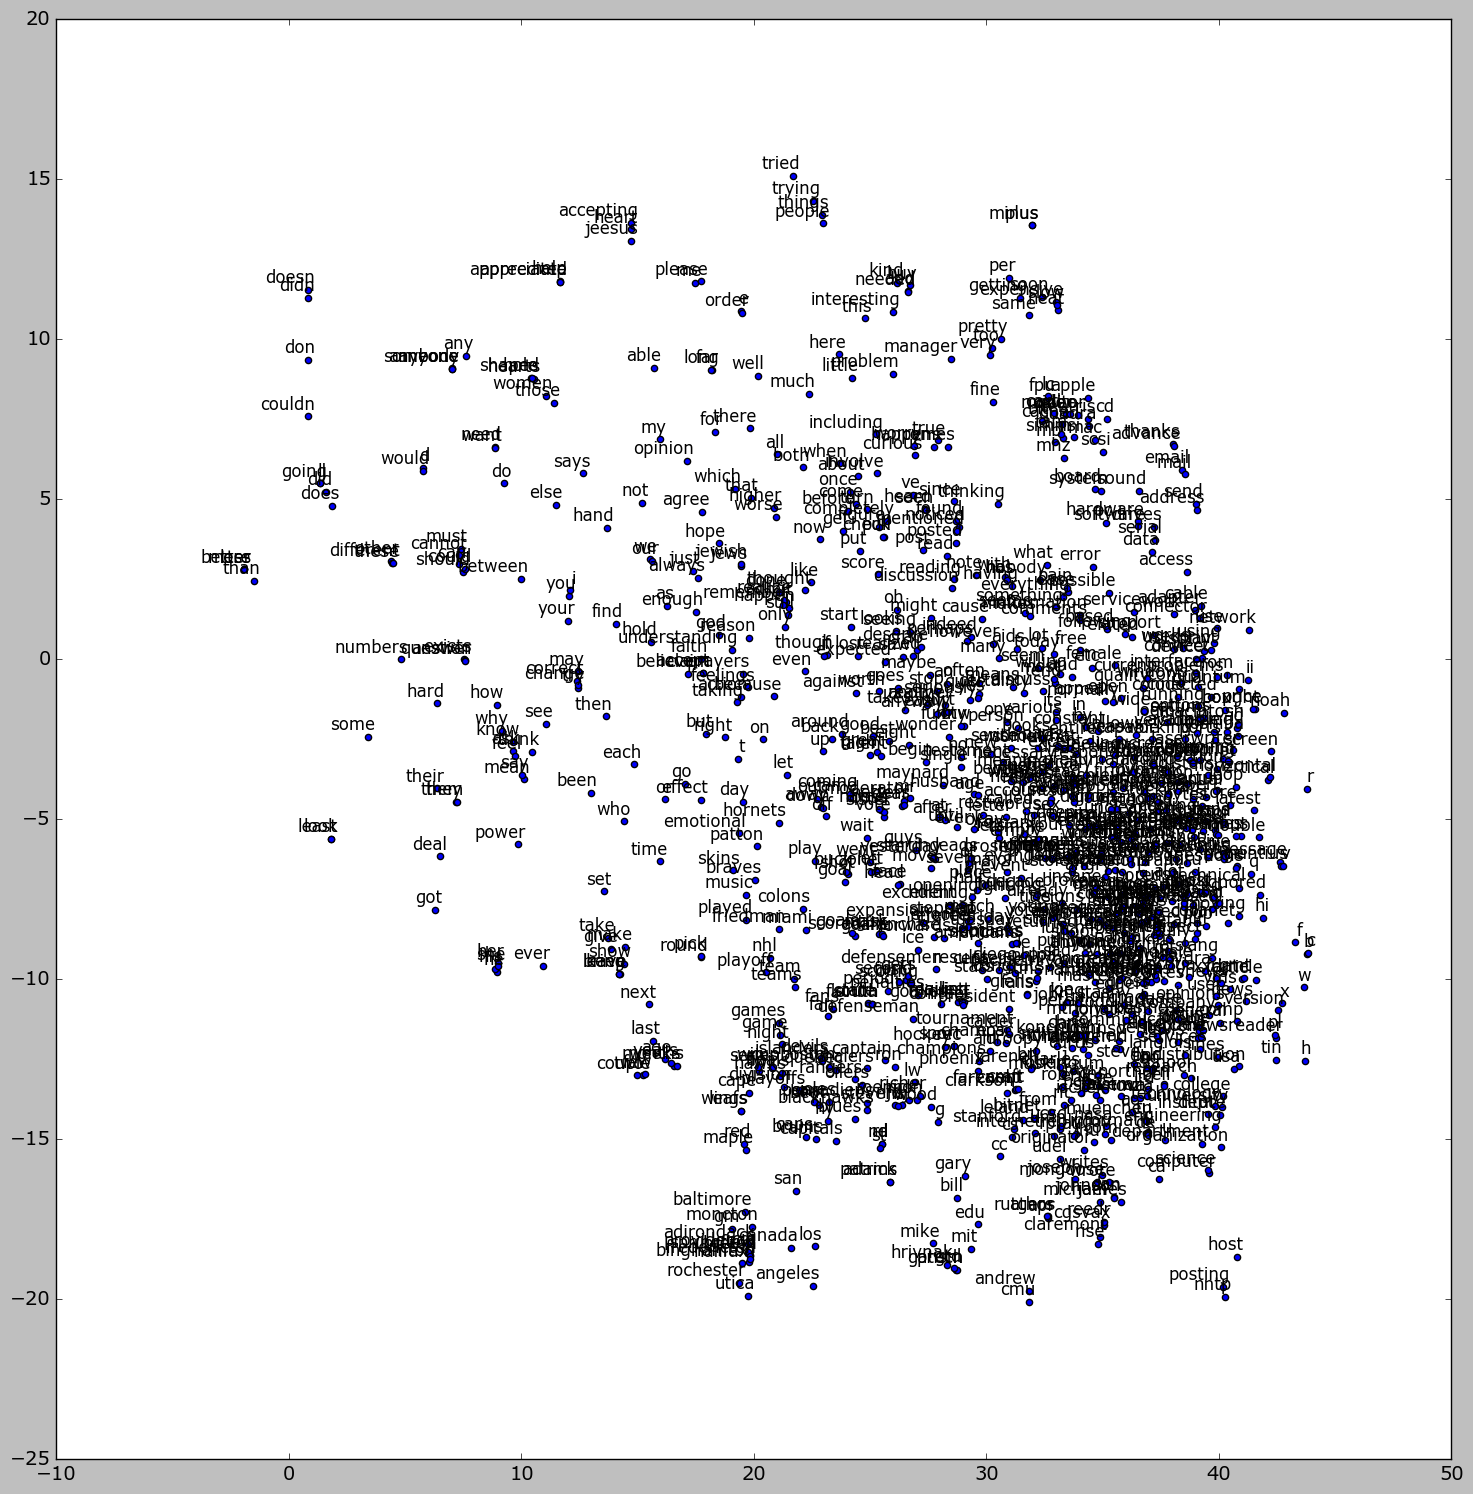

In [146]:
# Рисуем только первые 1000 слов

labels_to_draw = [labels[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels_to_draw)


### Пункт 0
Проделайте аналогичную отрисовку и сжатие векторов для предобученной модели (для этого скачайте бинарник по этой ссылке - https://code.google.com/archive/p/word2vec/ (файл GoogleNews-vectors-negative300) по аналогии с тем, как мы работали с русским корпусом). Сравните результаты

In [170]:
path_to_google = 'GoogleNews-vectors-negative300.bin'
model_google = gensim.models.KeyedVectors.load_word2vec_format(path_to_google, binary = True)

2017-11-18 22:25:48,808 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2017-11-18 22:27:34,160 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin


In [172]:
labels_google = []
embeddings_google = []
data_to_tsne = [item for sublist in data_normalized[:20] for item in sublist]
for x in list(set(data_to_tsne)):
    try:
        embeddings_google.append(model_google[x])
        labels_google.append(x)
    except KeyError:
        continue

In [173]:
del model_google

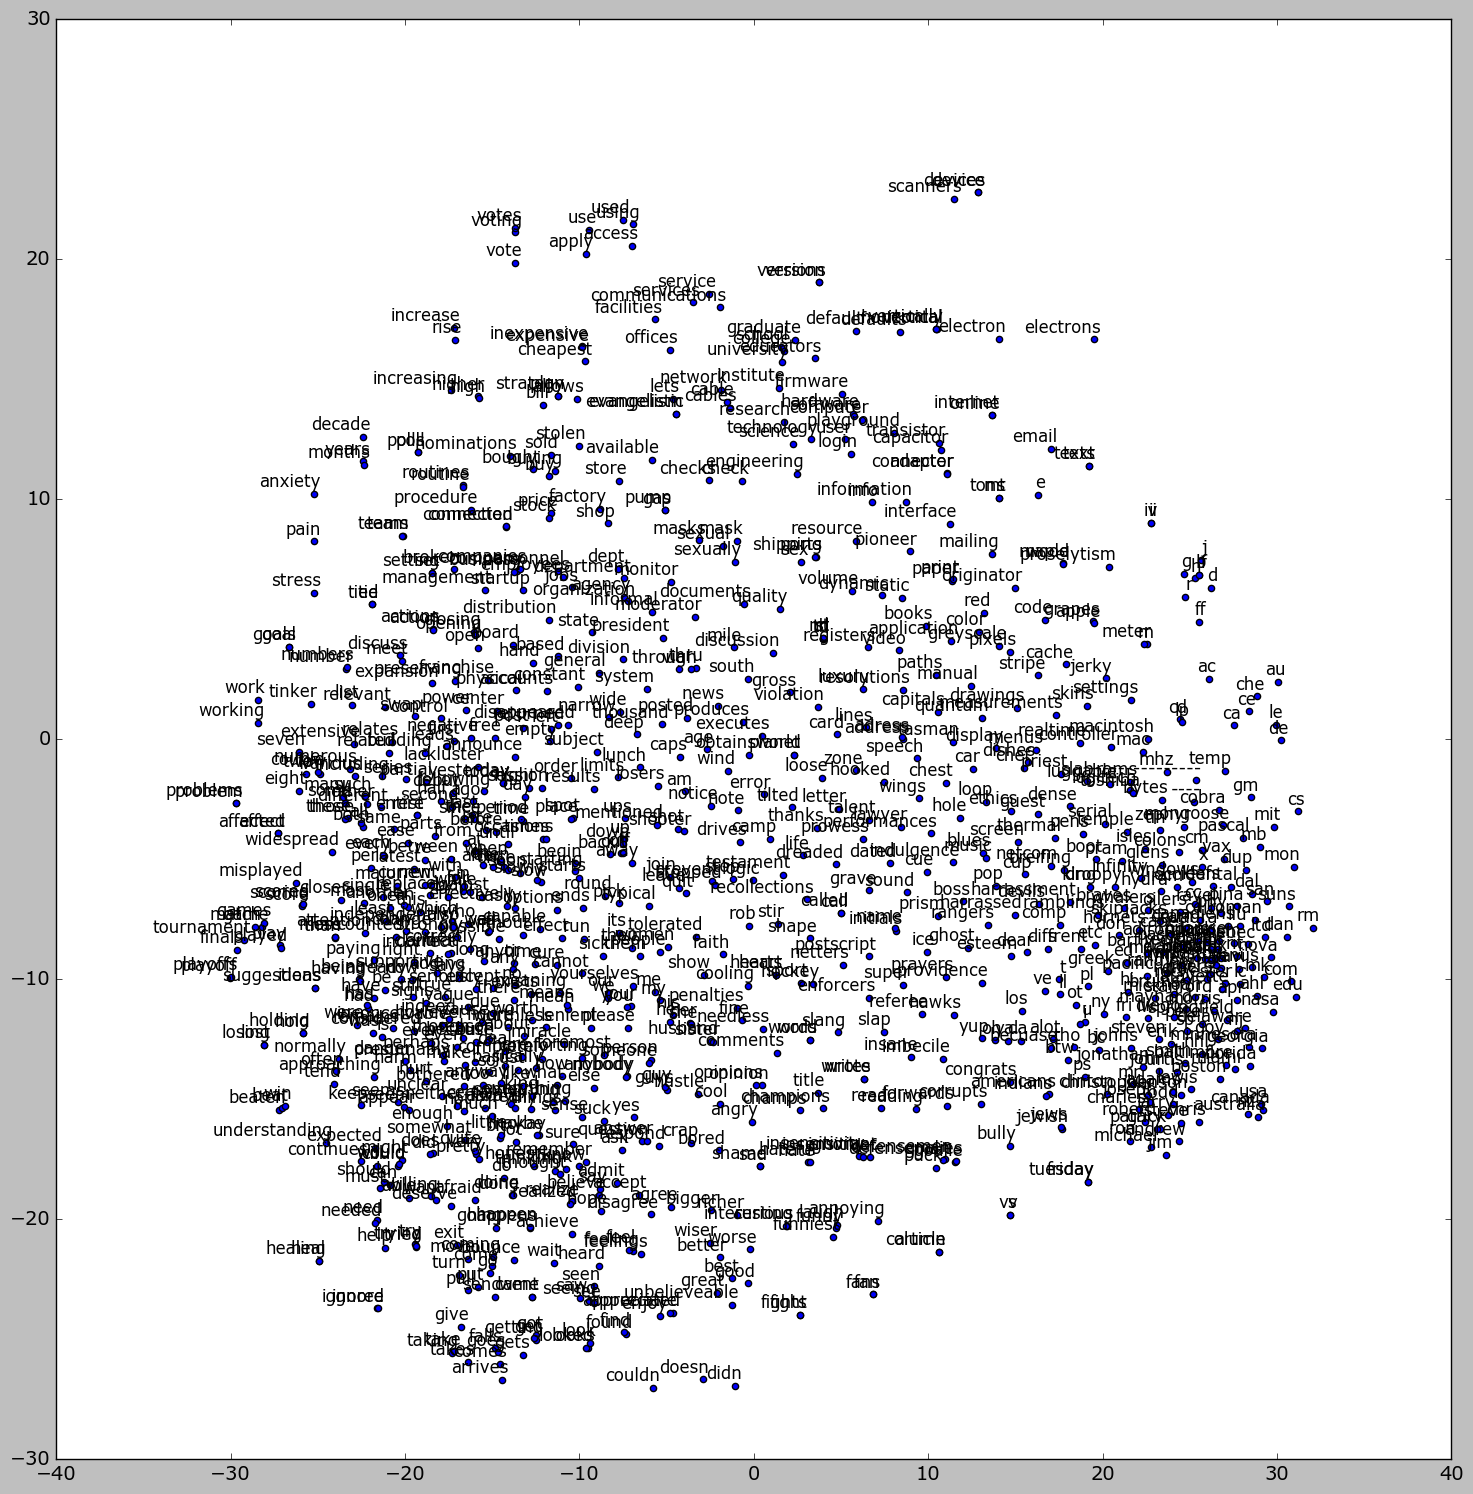

In [16]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 1000
low_dim_embs = tsne.fit_transform((embeddings_google[:plot_only]))
labels_to_draw = [labels_google[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels_to_draw)

### Попробуем с помощью нашей модели улучшить качество кластеризации текстов
Если вы не понимаете, что такое кластеризация - почитать об этом можно по ссылке  - http://scikit-learn.org/stable/modules/clustering.html

Если вам все равно кажется, что это сложно, и вы чувствуете себя более уверено в задаче классификации - вместо задачи кластеризации можно рассматривать задачу классификации - тогда вместо функции quality используйте roc-auc из библиотеки scikit learn, все остальные шаги предобработки и измерения признаков аналогичны

Мерить качество кластеризации будем следующим образом - измерим количество правильных попаданий категории в кластера

In [51]:
import itertools
def quality(preds, target):
    permutations = list(itertools.permutations([0, 1, 2]))
    scores = []
    for a, b, c in permutations:
        mapping = {2 : a, 1: b, 0: c}
        mapped_preds = [mapping[pred] for pred in preds]
        scores.append(float(sum(mapped_preds != target)) / len(target))
    return(1 - min(scores))

### Пункт 1

Кластеризуйте датасет с заданием признаков с помощью one hot encoding - посмотрите на результат

In [134]:
word_freq = {}
for i in range(len(data_normalized)):
    for j in range(len(data_normalized[i])):
        try:
            word_freq[data_normalized[i][j]] += 1
        except:
            word_freq[data_normalized[i][j]] = 1

In [135]:
import operator
word_sort = sorted(word_freq.items(), key=operator.itemgetter(1), reverse = True)
word_dict = dict(word_sort)

In [136]:
word_sort

[('and', 8625),
 ('i', 8603),
 ('in', 7902),
 ('that', 6899),
 ('it', 5004),
 ('for', 4165),
 ('you', 3708),
 ('from', 3497),
 ('not', 3253),
 ('edu', 3209),
 ('this', 3198),
 ('on', 3064),
 ('with', 2791),
 ('as', 2631),
 ('but', 2601),
 ('t', 2534),
 ('he', 2384),
 ('if', 2180),
 ('they', 2013),
 ('subject', 1890),
 ('or', 1863),
 ('lines', 1837),
 ('we', 1807),
 ('at', 1799),
 ('can', 1767),
 ('organization', 1718),
 ('what', 1633),
 ('all', 1569),
 ('my', 1533),
 ('there', 1524),
 ('by', 1522),
 ('god', 1503),
 ('would', 1492),
 ('one', 1488),
 ('an', 1425),
 ('do', 1352),
 ('about', 1339),
 ('who', 1291),
 ('has', 1271),
 ('his', 1209),
 ('so', 1206),
 ('no', 1148),
 ('me', 1097),
 ('writes', 1092),
 ('university', 1051),
 ('some', 1023),
 ('when', 994),
 ('com', 964),
 ('your', 941),
 ('out', 935),
 ('article', 927),
 ('any', 920),
 ('don', 909),
 ('ca', 906),
 ('think', 904),
 ('which', 886),
 ('like', 885),
 ('know', 881),
 ('people', 875),
 ('only', 873),
 ('their', 856),
 ('j

In [137]:
words = dict(zip(word_freq.keys(), range(len(word_freq))))
dw = np.zeros((len(data_normalized), len(word_freq)))
for i in range(dw.shape[0]):
    for j in range(len(data_normalized[i])):
        dw[i, words[data_normalized[i][j]]] += 1

In [138]:
%%time
from sklearn.cluster import KMeans
X = dw
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)


Wall time: 23 s


In [139]:
quality(kmeans.labels_, dataset.target)

0.39335959482273497

### Пункт 2
Далее кластеризуем тексты на векторах, полученных из модели, которую мы сами обучили

Напишем функцию, которая делает из предложения вектор - просто складывает вектора всех слов и усредняет. Если слов нет в словаре, то прибавляет нулевой вектор

In [140]:
def average_feature_vector(words, model):
    res = []
    for word in words:
        try:
            res.append(model[word])
        except:
            continue
    res = np.array(res)
    return np.mean(res, axis = 0)

Применим функцию к нашим данным (уже нормализованным функцией normalize)

In [147]:
data_normalized_vectors = [average_feature_vector(sent, model) for sent in data_normalized]

Сожмем массив признаковс помощью tsne до нескольких компонент (попробуйте поварьировать число компонент)

In [167]:
tsne = TSNE(perplexity=40, n_components=2, init='pca', n_iter=5000)
low_dim_vectors = tsne.fit_transform((data_normalized_vectors))

Примените алгоритм кластеризации (тут тоже есть где поэкспериментировать, можно K-means)

In [168]:
%%time
kmeans = KMeans(n_clusters=3, random_state=0).fit(low_dim_vectors)

Wall time: 15.7 ms


In [169]:
quality(kmeans.labels_, dataset.target)

0.9589195272931907

### Пункт 3

Кластеризуем тексты на векторах, полученных из предобученной модели. Какой результат получился лучше? Почему?

In [175]:
model_google = dict(zip(labels_google, embeddings_google))
data_normalized_vectors = [average_feature_vector(sent, model_google) for sent in data_normalized]
tsne = TSNE(perplexity=40, n_components=2, init='pca', n_iter=5000)
low_dim_vectors = tsne.fit_transform((data_normalized_vectors))
kmeans = KMeans(n_clusters=3, random_state=0).fit(low_dim_vectors)
quality(kmeans.labels_, dataset.target)

0.8581879572312887

### Пункт 4 - для суперменов

Попробуйте получить аналогичные вектора и провети исследование на них с помощью fastq - неплохое введение - https://www.analyticsvidhya.com/blog/2017/07/word-representations-text-classification-using-fasttext-nlp-facebook/

In [ ]:
<Ваш код>

### Правила сдачи и критерии оценки:

##### Суперобязательная часть (40 % баллов)

1) Дописать функцию normalize, нормализующую тексты 

2) Пункт 0

##### Обязательная часть (40 % баллов)

1) Пункт 1

2) Пункт 2

3) Пункт 3

##### Продвинутая часть (20 % баллов)

1) Любые самые смелые ваши идеи-эксперименты по тому, как можно улучшить качество моделей (пофильтровать какие-то части речи, редкие слова, использовать FastText)

2) Интересные, необычные, просто хорошо сформулированные выводы о вашей работе в отчете

При проверке отчета будет обращаться внимание на ваш анализ и оригинальность подходов) Не нужно бояться экспериментировать и гуглить - машинное обучение ближе, чем кажется!


##### Как и куда сдавать:

К jupiter- тетрадке нужно приложить текстовый отчет (желательно в word), в котором вы описываете, какие шаги выполняли, какое качество-графики получали и что это значит.

Свой jupiter-noteebook вместе с отчетом присылать на почту savelievatanyya@gmail.com или в телеграмм http://telegram.me/tany_savelieva  со своим именем в качестве названия.

Дедлайн - 19 ноября 9 утра

ПО ВСЕМ ВОПРОСАМ, КАСАЮЩИМСЯ ЗАДАНИЯ (например, Таня, я не знаю, где смотреть, как кластеризуются-нормализуются тексты ) МОЖНО и НУЖНО писать мне на почту-в телеграмм - обещаю ответить в течение дня!